For p=0.5, n=5:
Expectation (Mean): 2.5
Variance: 1.25
For p=0.5, n=50:
Expectation (Mean): 25.0
Variance: 12.5
For p=0.1, n=60:
Expectation (Mean): 6.0
Variance: 5.4
For p=0.5, n=60:
Expectation (Mean): 30.0
Variance: 15.0


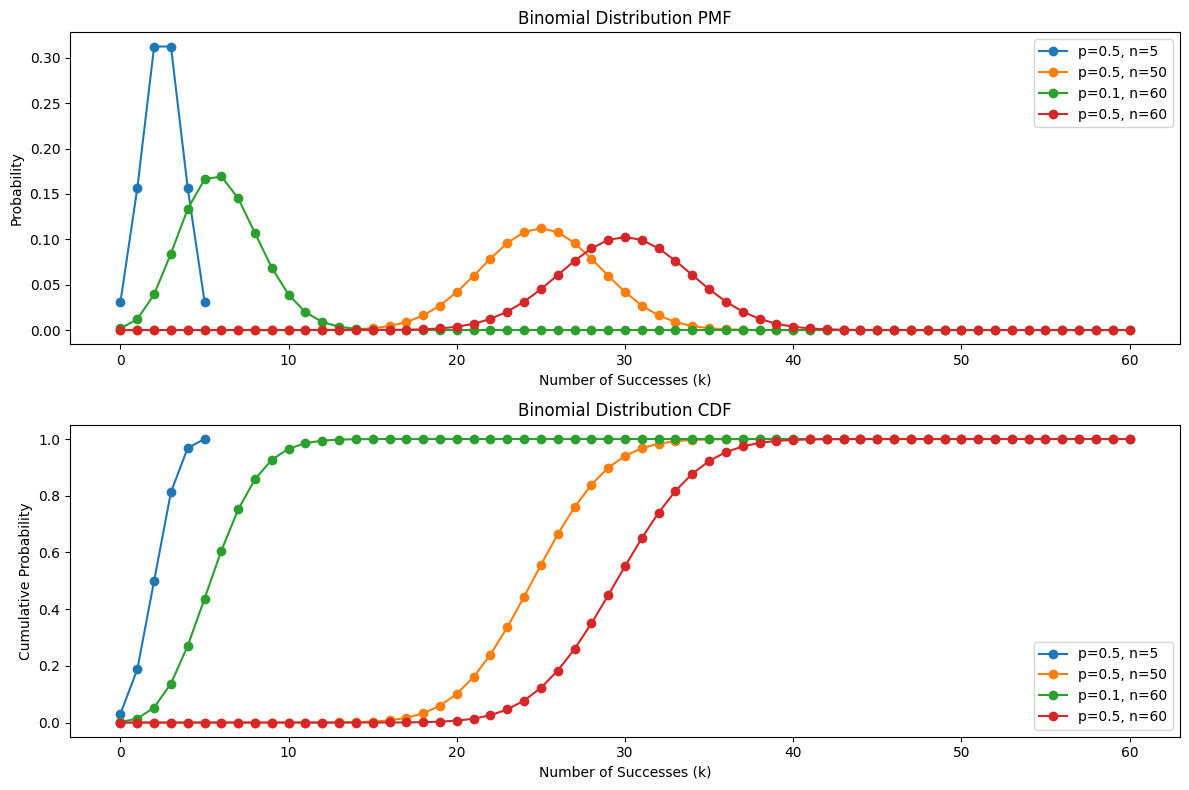

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Function to calculate binomial PMF
def binomial_pmf(k, n, p):
    return comb(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Function to calculate binomial CDF
def binomial_cdf(k, n, p):
    cdf_value = 0
    for i in range(k + 1):
        cdf_value += comb(n, i) * (p ** i) * ((1 - p) ** (n - i))
    return cdf_value
    
def binomial_expectation(n, p):
    return n*p

def binomial_variance(n, p):
    return n * p * (1 - p)
# Set parameters for three scenarios
parameters = [(0.5, 5), (0.5, 50), (0.1, 60), (0.5, 60)]

# Plot both PMF and CDF for each scenario
plt.figure(figsize=(12, 8))

for p, n in parameters:
    k_values = np.arange(0, n+1)
    pmf_values = [binomial_pmf(k, n, p) for k in k_values]
    cdf_values = [binomial_cdf(k, n, p) for k in k_values]

    expectation = binomial_expectation(n, p)
    variance = binomial_variance(n, p)
    # Plot PMF
    plt.subplot(2, 1, 1)
    plt.plot(k_values, pmf_values, marker='o', label=f'p={p}, n={n}')
    plt.title('Binomial Distribution PMF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Probability')
    plt.legend()

    # Plot CDF
    plt.subplot(2, 1, 2)
    plt.plot(k_values, cdf_values, marker='o', label=f'p={p}, n={n}')
    plt.title('Binomial Distribution CDF')
    plt.xlabel('Number of Successes (k)')
    plt.ylabel('Cumulative Probability')
    plt.legend()

    print(f"For p={p}, n={n}:")
    print(f"Expectation (Mean): {expectation}")
    print(f"Variance: {variance}")
    

plt.tight_layout()
plt.show()